### Neural Prophet

The perks of using Neaural prophet:
- Support for auto-regression and covariates.
- Automatic selection of hyperparameters.
- Fourier term seasonality at different perios such as yearly, daily, weakly and hourly.
- Piecewise linear trend with optional uautomtic changepoint detection.
- Plotting forecast componenets, model coefficients and final predictions.
- Support for lobal modeling.
- Lagged and future regressors.
- Sparsity of coefficients through regulatization.

In [3]:
# !pip install neuralprophet

     -------------------------------------- 104.0/104.0 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 167.3/167.3 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0


In [3]:
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from neuralprophet import set_random_seed
set_random_seed(0)

### Quick start

In [10]:
# the data format is the same as in Prophet.
PATH = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"

df = pd.read_csv(PATH + 'wp_log_peyton_manning.csv')

In [31]:
df.head()

,ds,y
0,2007-12-10,9.5908
1,2007-12-11,8.5196
2,2007-12-12,8.1837
3,2007-12-13,8.0725
4,2007-12-14,7.8936


In [6]:
model = NeuralProphet(growth='linear',
                      changepoints=None,
                      n_changepoints=10,
                      changepoints_range=0.8,
                      trend_reg=0,
                      trend_reg_threshold=False,
                      trend_global_local='global',
                      yearly_seasonality='auto',
                      weekly_seasonality='auto',
                      daily_seasonality='auto',
                      seasonality_mode='additive',
                      seasonality_reg=0,
                      season_global_local='global',
                      n_forecasts=1,
                      n_lags=0,
                      num_hidden_layers=0,
                      d_hidden=None,
                      ar_reg=None,
                      learning_rate=None,
                      epochs=None,
                      batch_size=None,
                      loss_func='Huber',
                      optimizer='AdamW',
                      newer_samples_weight=2,
                      newer_samples_start=0.0,
                      quantiles=None,
                      impute_missing=True,
                      impute_linear=10,
                      impute_rolling=10,
                      drop_missing=False,
                      collect_metrics=True,
                      normalize='auto',
                      global_normalization=False,
                      global_time_normalization=True,
                      unknown_data_normalization=False
                      )
metrics = model.fit(df)
# in sample predictions.
forecast = model.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.62E-01, min: 6.66E-02


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.15E-01, min: 6.66E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.86E-01
Epoch[141/141]: 100%|██████████| 141/141 [00:27<00:00,  5.11it/s, SmoothL1Loss=0.00617, MAE=0.348, RMSE=0.486, Loss=0.00472, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [12]:
df.ds.values[0], df.ds.values[-1]

('2007-12-10', '2016-01-20')

In [14]:
forecast.ds.values[0], forecast.ds.values[-1]

(numpy.datetime64('2007-12-10T00:00:00.000000000'),
 numpy.datetime64('2016-01-20T00:00:00.000000000'))

In [15]:
forecast.head()

,ds,y,residual1,yhat1,trend,season_yearly,season_weekly
0,2007-12-10,9.5908,-0.903641,8.687159,7.976281,0.349832,0.361046
1,2007-12-11,8.5196,-0.075939,8.443661,7.975315,0.343055,0.125291
2,2007-12-12,8.1837,0.068552,8.252252,7.974349,0.337572,-0.059670
3,2007-12-13,8.0725,0.164501,8.237001,7.973383,0.333534,-0.069916
4,2007-12-14,7.8936,0.338793,8.232393,7.972417,0.331083,-0.071108


In [21]:
metrics

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,0.427878,3.620883,4.427964,0.319682,0.0
1,0.328437,3.085089,3.777569,0.244243,0.0
2,0.219357,2.447012,3.004871,0.162190,0.0
3,0.116573,1.756133,2.147108,0.086311,0.0
4,0.050207,1.148258,1.401506,0.037167,0.0
...,...,...,...,...,...
136,0.006187,0.347480,0.485154,0.004740,0.0
137,0.006178,0.348678,0.485560,0.004732,0.0
138,0.006169,0.347598,0.481665,0.004725,0.0
139,0.006163,0.347534,0.484749,0.004720,0.0


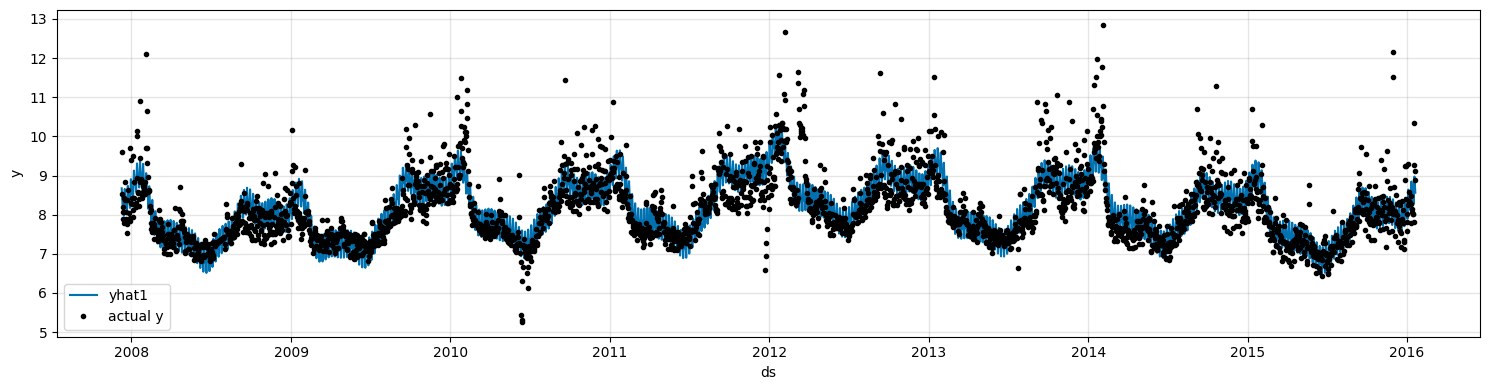

In [11]:
model.plot(forecast, figsize = (15, 4));

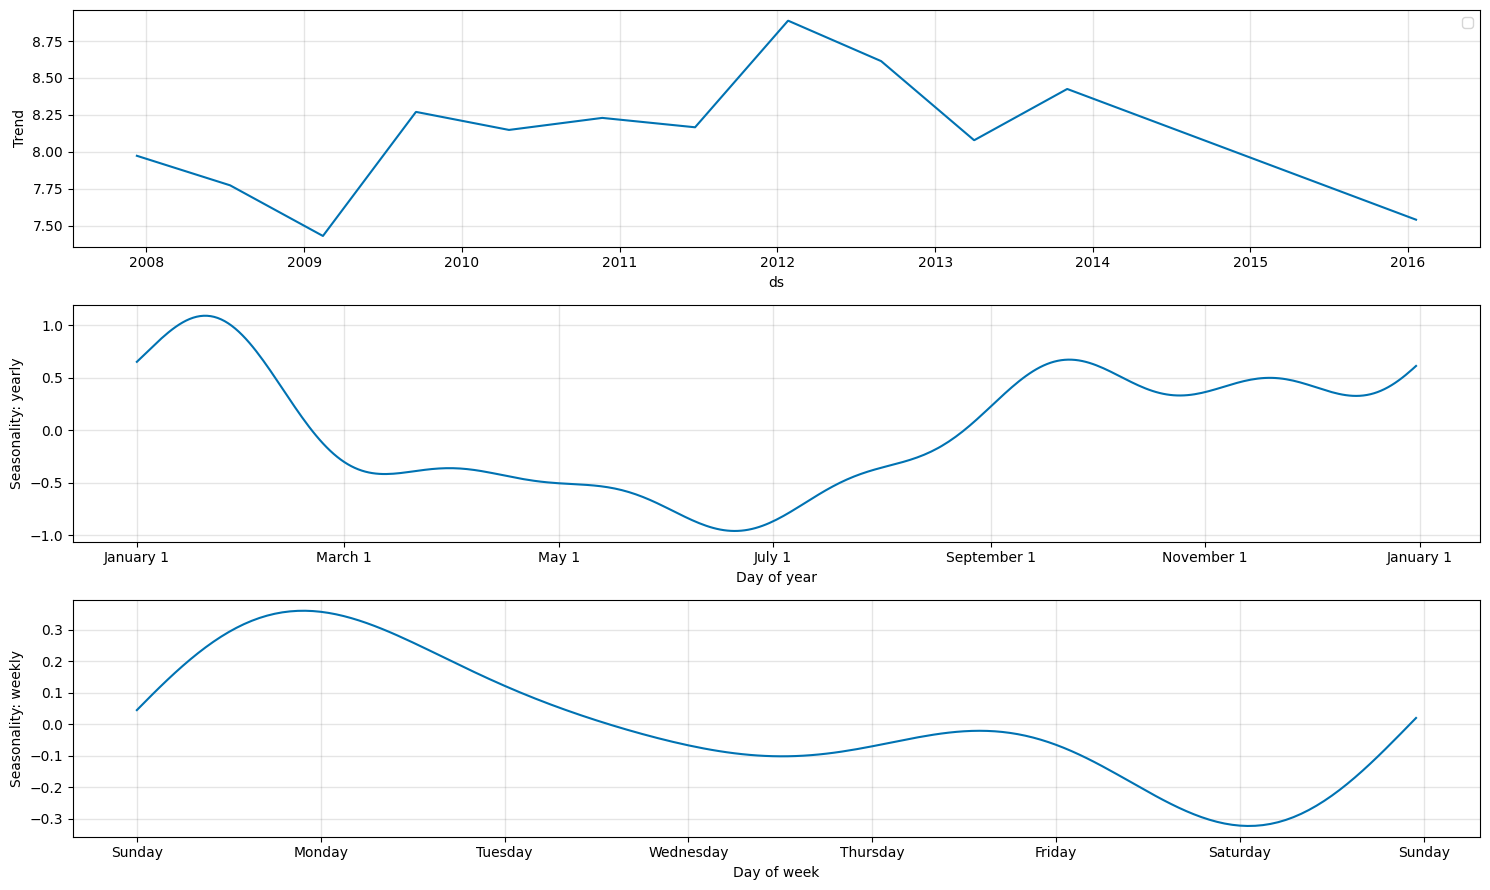

In [14]:
model.plot_components(forecast, figsize = (15, 9));

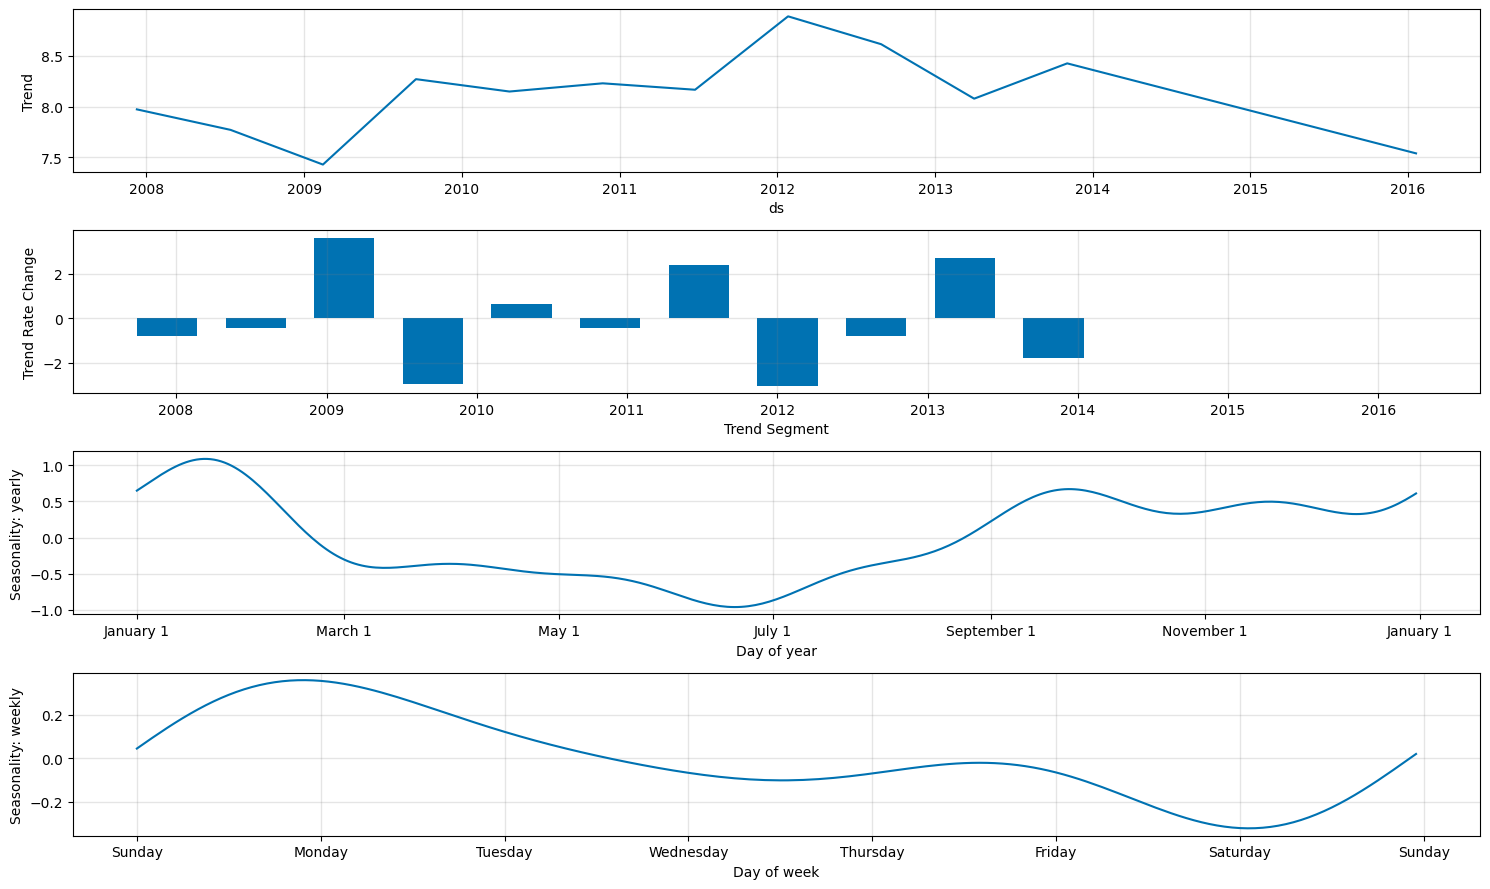

In [20]:
# The individual coefficient values can also be plotted as below to gain further insights.
model.plot_parameters(figsize = (15, 9));

In [25]:
model = NeuralProphet()
df_train, df_val = model.split_df(df, valid_p = 0.2)

train_metrics = model.fit(df_train)
test_metrics = model.test(df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.958% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 150


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.60E-02, min: 6.83E-01


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.65E-02, min: 7.98E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.20E-02
Epoch[150/150]: 100%|██████████| 150/150 [00:29<00:00,  5.04it/s, SmoothL1Loss=0.00597, MAE=0.35, RMSE=0.491, Loss=0.00471, RegLoss=0] 
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.831% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
C:\Users\ravazzil\Anaconda3\envs\github_env\lib\site-packages\torch\nn\modules\loss.py:928: UserWarning: Using a target size (torch.Size([592])) that is different to the input size (torch.Size([592, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.029  0.

### Trend

In [16]:
model = NeuralProphet(
    n_changepoints=100,
    trend_reg=2,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False
)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.


In [23]:
help(NeuralProphet())

Help on NeuralProphet in module neuralprophet.forecaster object:

class NeuralProphet(builtins.object)
 |  NeuralProphet(growth='linear', changepoints=None, n_changepoints=10, changepoints_range=0.8, trend_reg=0, trend_reg_threshold=False, trend_global_local='global', yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', seasonality_mode='additive', seasonality_reg=0, season_global_local='global', n_forecasts=1, n_lags=0, num_hidden_layers=0, d_hidden=None, ar_reg=None, learning_rate=None, epochs=None, batch_size=None, loss_func='Huber', optimizer='AdamW', newer_samples_weight=2, newer_samples_start=0.0, quantiles=None, impute_missing=True, impute_linear=10, impute_rolling=10, drop_missing=False, collect_metrics=True, normalize='auto', global_normalization=False, global_time_normalization=True, unknown_data_normalization=False)
 |  
 |  NeuralProphet forecaster.
 |  
 |  A simple yet powerful forecaster that models:
 |  Trend, seasonality, events, holidays, au

In [17]:
metrics = model.fit(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.56E-01, min: 2.72E-03


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.15E-01, min: 2.72E-03
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.45E-01
Epoch[141/141]: 100%|██████████| 141/141 [00:22<00:00,  6.29it/s, SmoothL1Loss=0.0125, MAE=0.538, RMSE=0.698, Loss=0.275, RegLoss=0.266]  


In [21]:
forecast = model.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


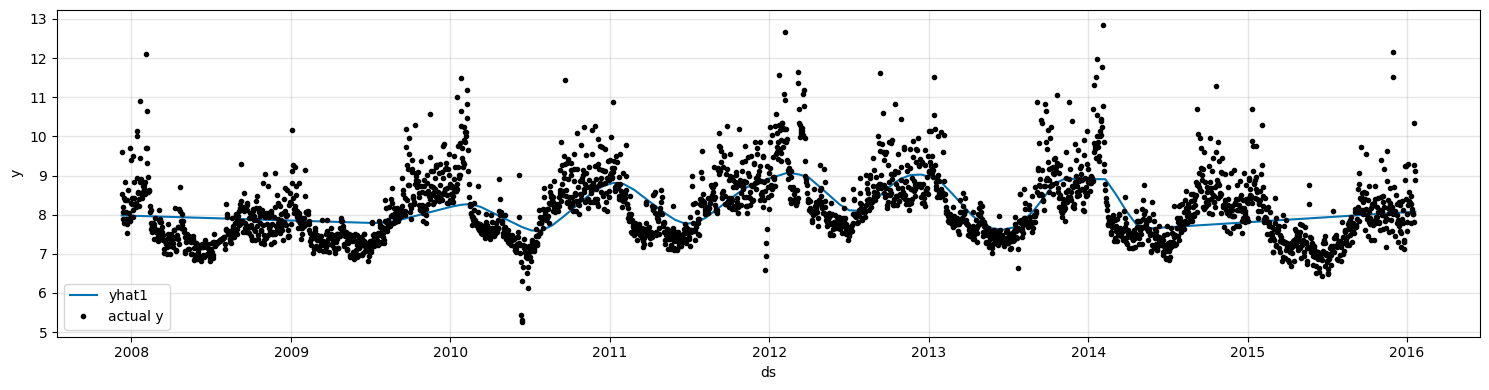

In [22]:
model.plot(forecast, figsize = (15, 4));

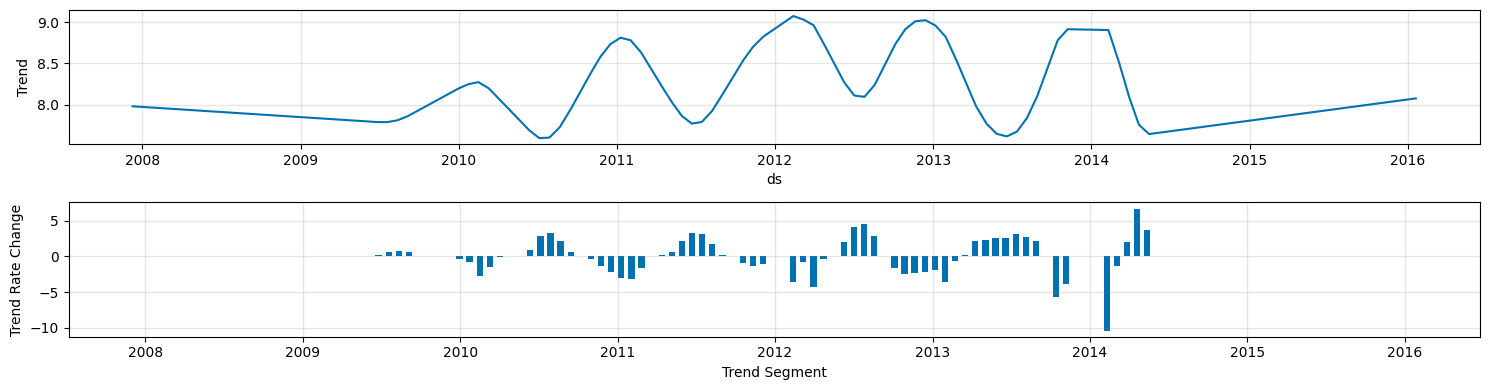

In [27]:
model.plot_parameters(figsize = (15, 4));

### Seasonality

The deafult Seasonality is additive. NeuralProphet fits any seasonality that is possible with the data. The model also assigns default values to the number of Fourier terms desired for every seasonality.

In [28]:
model = NeuralProphet()
metrics = model.fit(df)
metrics

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.06E-01, min: 1.03E+00


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.83E-01, min: 7.63E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.45E-01
Epoch[141/141]: 100%|██████████| 141/141 [00:29<00:00,  4.86it/s, SmoothL1Loss=0.00616, MAE=0.346, RMSE=0.482, Loss=0.00472, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,0.471740,3.841743,4.714224,0.339259,0.0
1,0.228753,2.513284,3.070017,0.158096,0.0
2,0.089537,1.555529,1.868752,0.058680,0.0
3,0.033926,0.926117,1.152811,0.022071,0.0
4,0.013221,0.532189,0.717294,0.009016,0.0
...,...,...,...,...,...
136,0.006249,0.351035,0.486246,0.004788,0.0
137,0.006231,0.348496,0.486103,0.004771,0.0
138,0.006197,0.349165,0.482949,0.004743,0.0
139,0.006177,0.346523,0.483810,0.004730,0.0


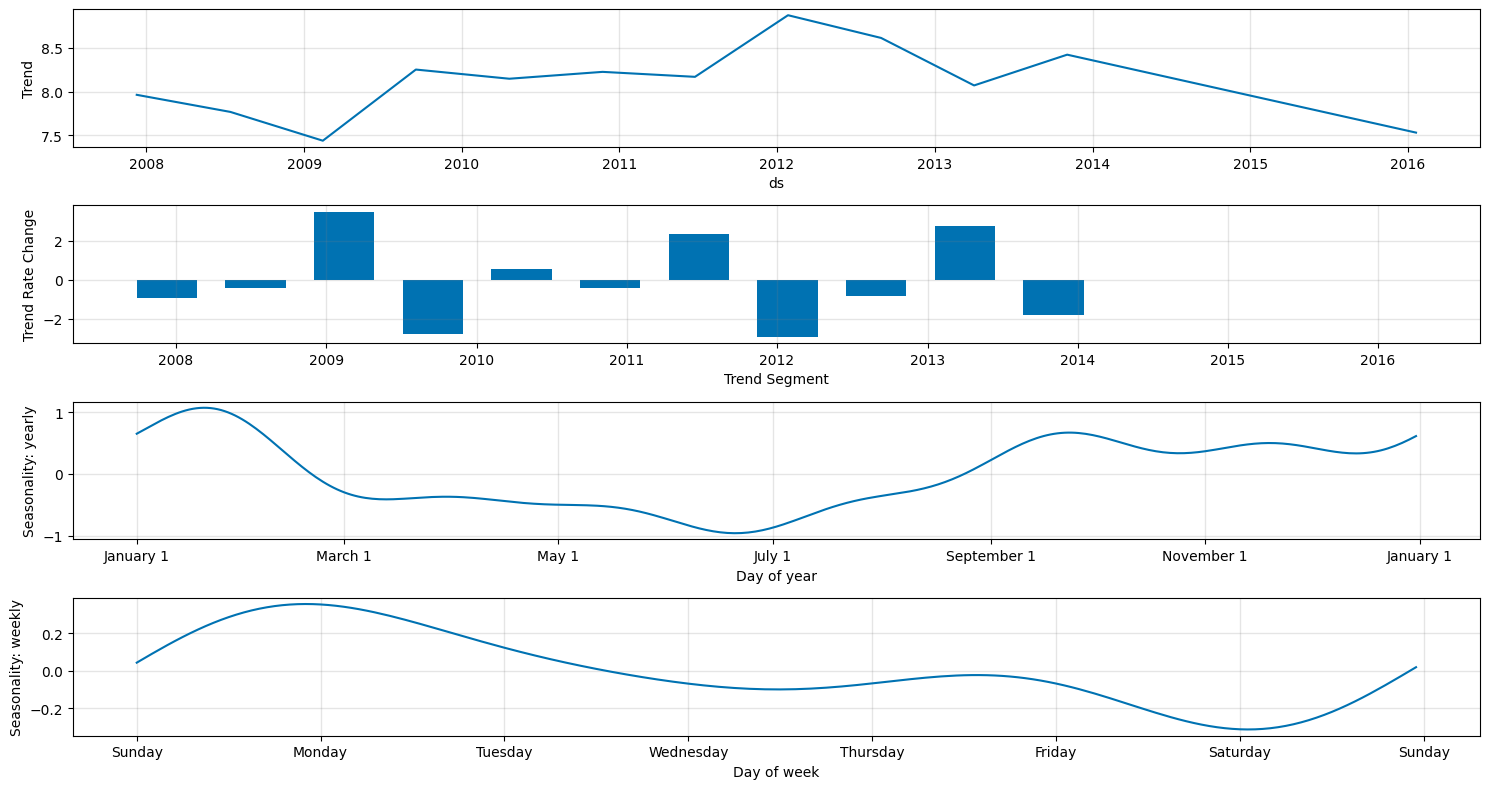

In [30]:
model.plot_parameters(figsize = (15, 8));

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.03E-02, min: 2.22E+00


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.03E-02, min: 1.20E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.35E-02
Epoch[141/141]: 100%|██████████| 141/141 [00:25<00:00,  5.56it/s, SmoothL1Loss=0.00616, MAE=0.347, RMSE=0.487, Loss=0.00472, RegLoss=0]


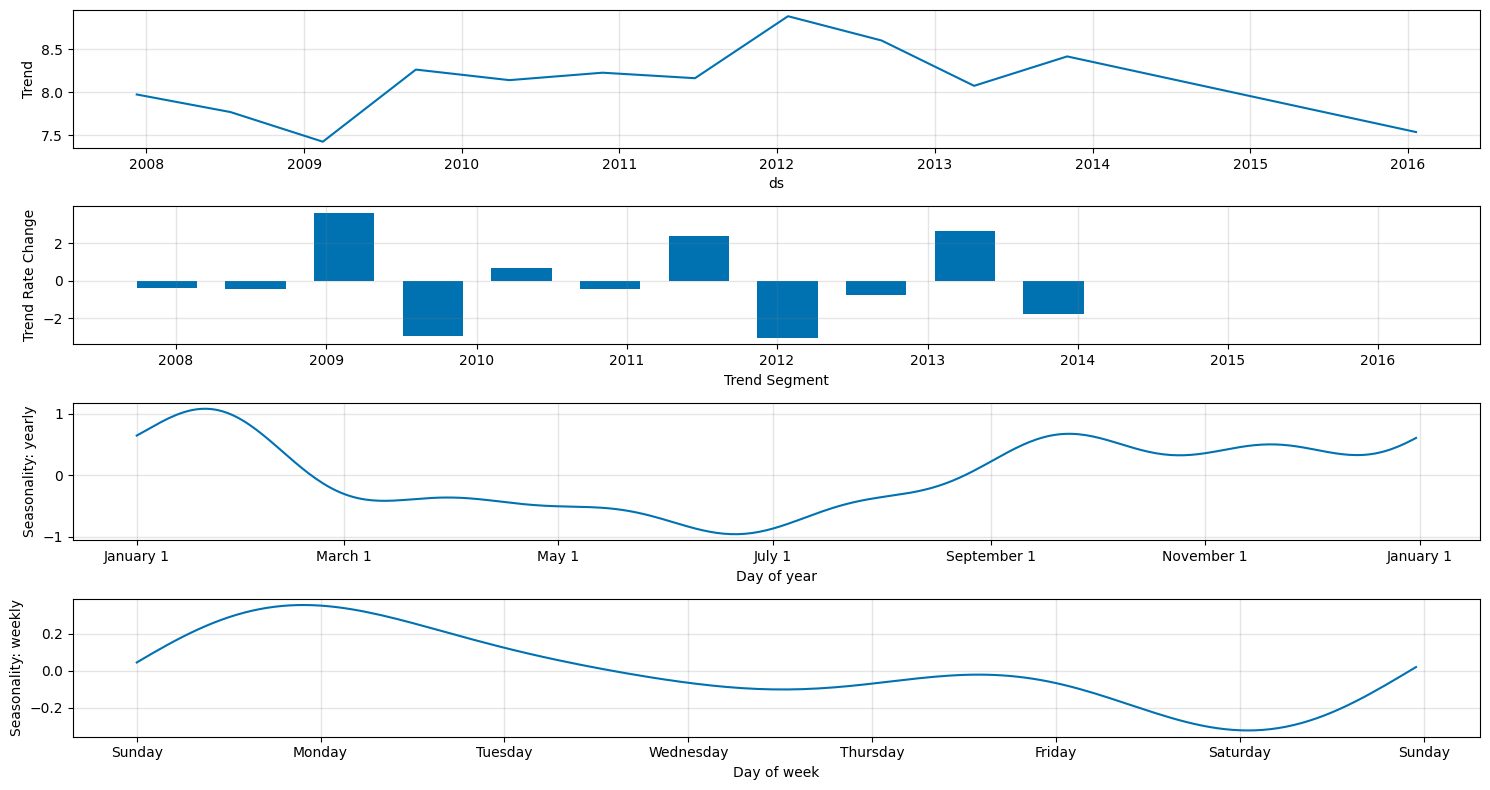

In [33]:
# You can assign the Fourier order to the seasonality.
model = NeuralProphet(
    yearly_seasonality = 8,
    weekly_seasonality = 3
)
model = NeuralProphet()
model.fit(df)
model.plot_parameters(figsize = (15, 8));

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.66E-01, min: 5.62E-01


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.56E-01, min: 1.20E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.81E-01
Epoch[141/141]: 100%|██████████| 141/141 [00:24<00:00,  5.67it/s, SmoothL1Loss=0.00617, MAE=0.347, RMSE=0.484, Loss=0.00472, RegLoss=0]


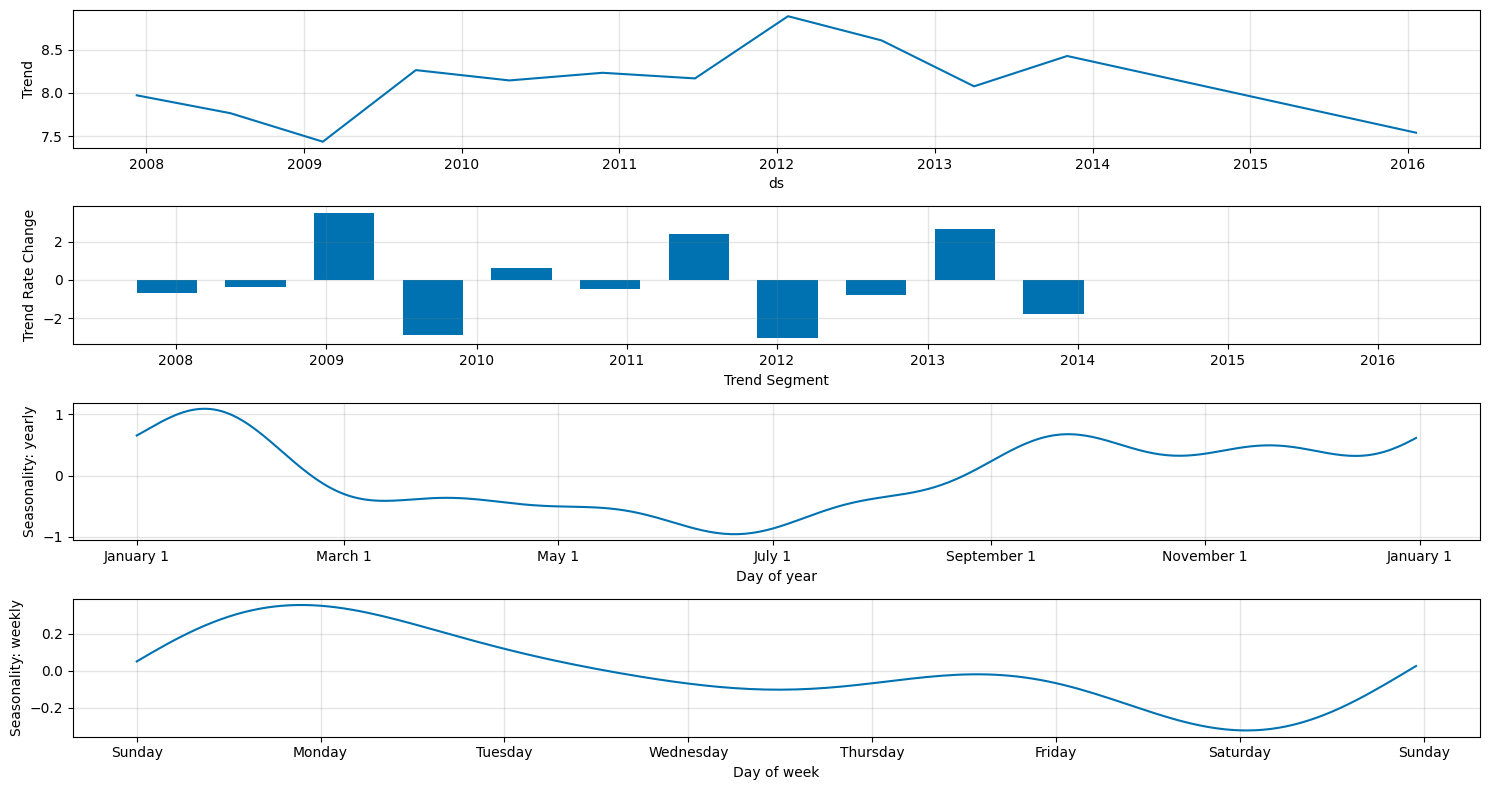

In [34]:
# Seasonality can be multiplicative.
model = NeuralProphet(
    seasonality_mode='multiplicative'
)
model = NeuralProphet()
model.fit(df)
model.plot_parameters(figsize = (15, 8));

In [1]:
# Regularize seasonality means regularize the Fourier coefficients.
# Seasonality can be multiplicative.
model = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
    seasonality_reg=1
)
model = NeuralProphet()
model.fit(df)
model.plot_parameters(figsize = (15, 8));

NameError: name 'NeuralProphet' is not defined

### Modelling Auto-Regression

AR-Net can be enabled by setting *n_lags* values. It is also possibl to use lagged regressors.

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.22E-02, min: 2.22E+00


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.22E-02, min: 3.01E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.62E-02
Epoch[141/141]: 100%|██████████| 141/141 [00:22<00:00,  6.36it/s, SmoothL1Loss=0.00606, MAE=0.329, RMSE=0.487, Loss=0.00471, RegLoss=0]


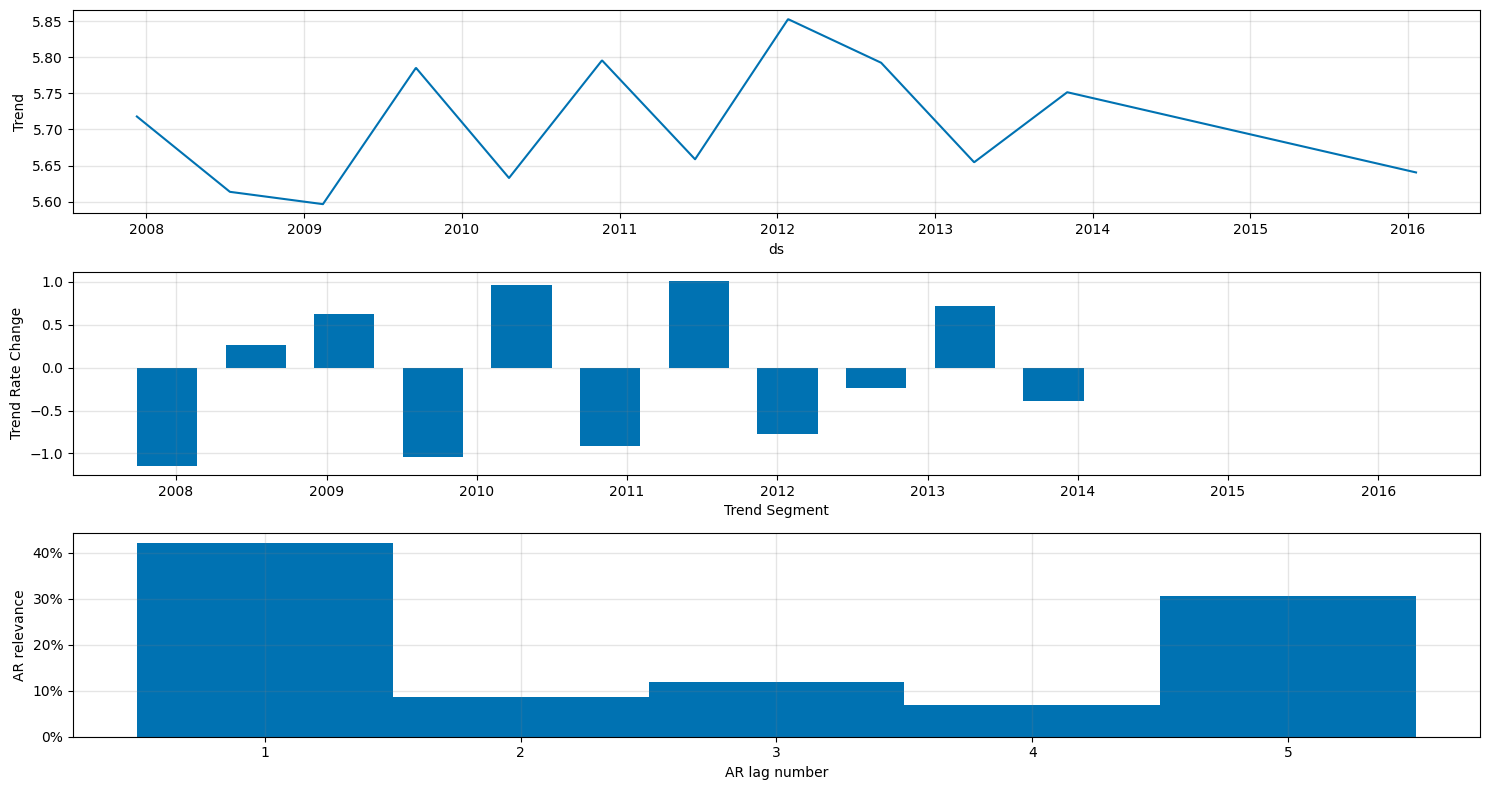

In [37]:
# In the following example, we create a forecasting scenario which feeds
# 5 lags into AR-Net and receives 3 steps as forecasts.

model = NeuralProphet(
    n_forecasts=3,
    n_lags=5,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
model.fit(df)
model.plot_parameters(figsize = (15, 8));

# the following plot shows the relevance of each lag.

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.69E-02, min: 3.50E+00


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.97E-02, min: 1.40E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.22E-02
Epoch[141/141]: 100%|██████████| 141/141 [00:32<00:00,  4.38it/s, SmoothL1Loss=0.00571, MAE=0.322, RMSE=0.473, Loss=0.00444, RegLoss=0]


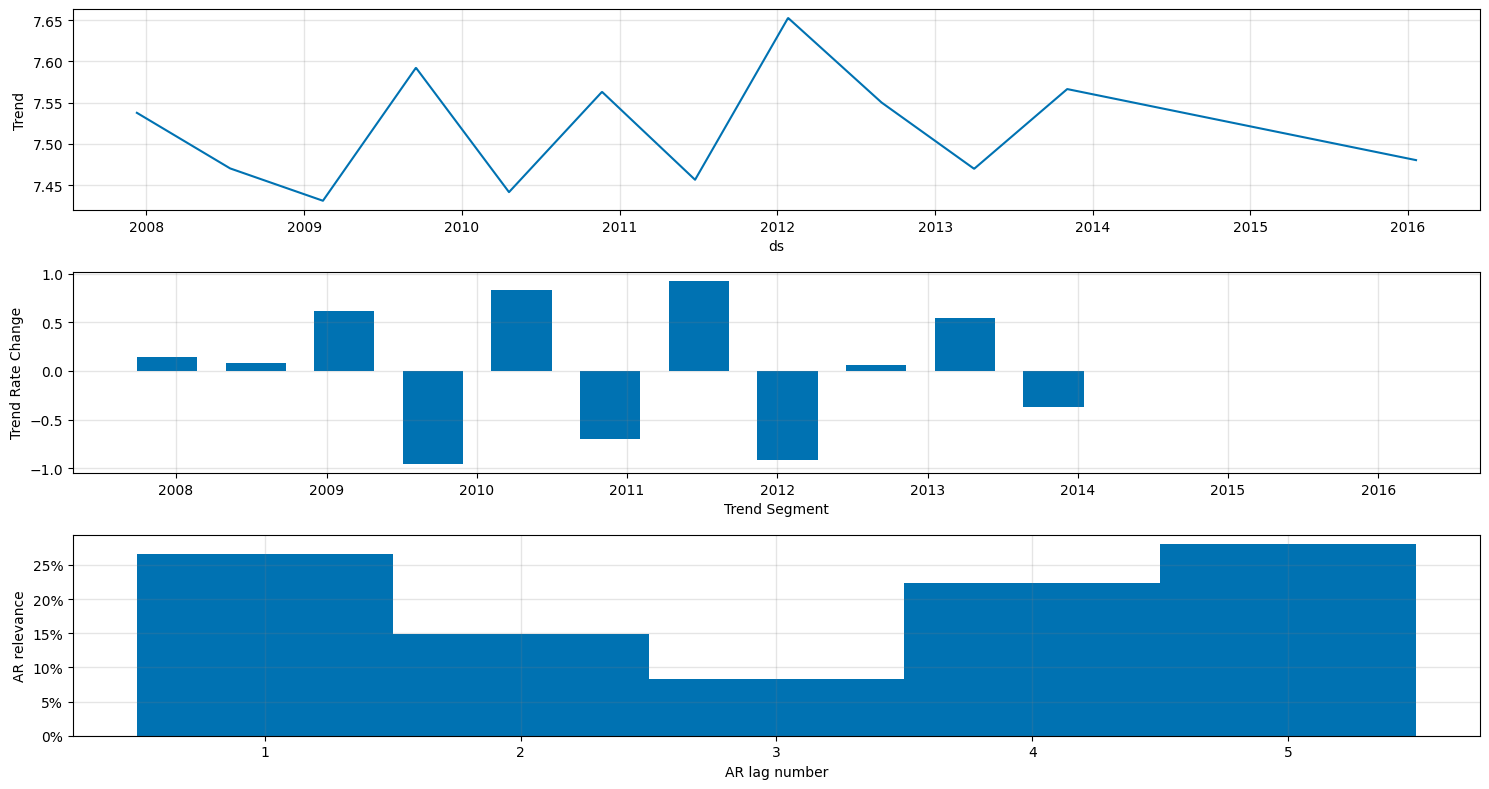

In [39]:
# Define hidden layers to increase the network's complexity.

model = NeuralProphet(
    n_forecasts=3,
    n_lags=5,
    num_hidden_layers=2,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
model.fit(df)
model.plot_parameters(figsize = (15, 8));

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.96E+01, min: 4.75E+00


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.96E+01, min: 4.08E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.44E+00
Epoch[141/141]: 100%|██████████| 141/141 [00:30<00:00,  4.65it/s, SmoothL1Loss=0.0141, MAE=0.571, RMSE=0.746, Loss=0.011, RegLoss=3.02e-9] 


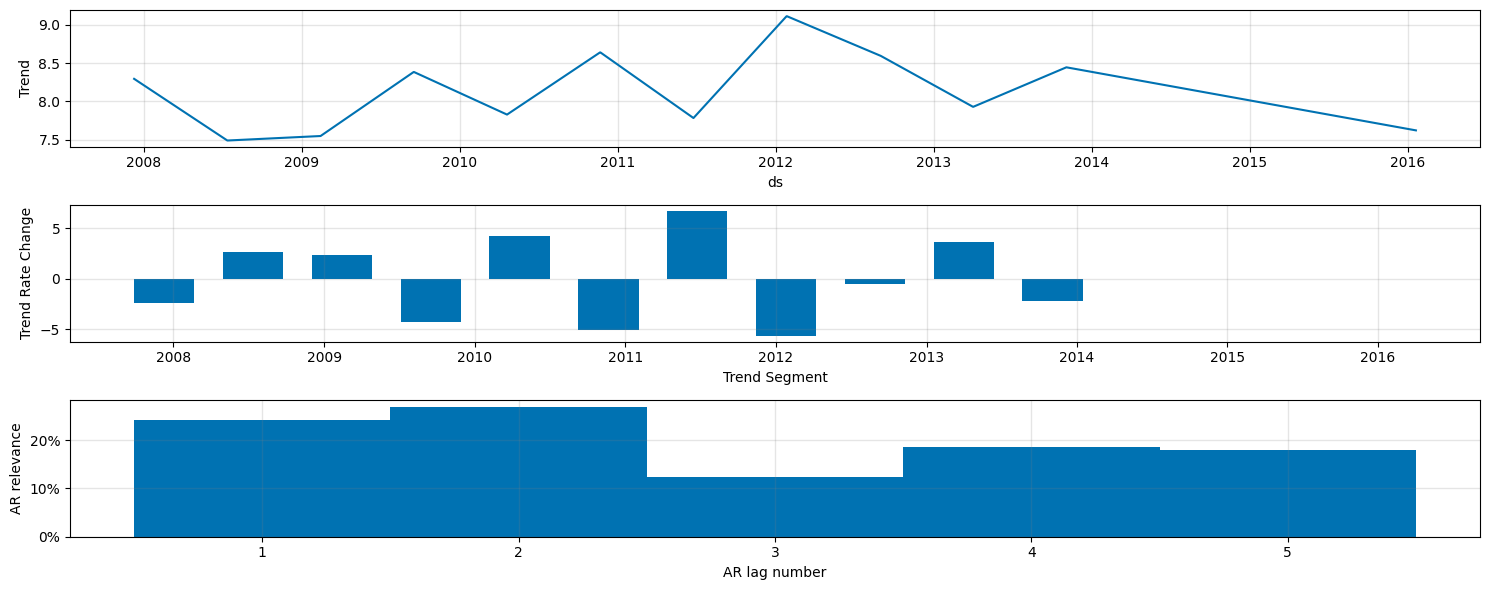

In [51]:
# regularization of neural network.
model = NeuralProphet(
    n_forecasts=3,
    n_lags=5,
    num_hidden_layers=2,
    ar_reg=0.01,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False
)
metrics = model.fit(df)
model.plot_parameters(figsize = (15, 6));

In [ ]:
# Adding some regressors: only_last_value  defines how to deal with the lagged values of the regressor.
model.add_lagged_regressor(name = 'A')

### Modeling events

In [19]:
playoffs_history = pd.DataFrame({
        'event': 'playoff',
        'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                              '2010-01-24', '2010-02-07', '2011-01-08',
                              '2013-01-12', '2014-01-12', '2014-01-19',
                              '2014-02-02', '2015-01-11', '2016-01-17']),
    })

superbowls_history = pd.DataFrame({
    'event': 'superbowl',
    'ds': pd.to_datetime(['2010-02-07', '2014-02-02']),
    })
history_events_df = pd.concat((playoffs_history, superbowls_history))

In [20]:
playoffs_future = pd.DataFrame({
    'event': 'playoff',
    'ds': pd.to_datetime(['2016-01-21', '2016-02-07'])
})

superbowl_future = pd.DataFrame({
    'event': 'superbowl',
    'ds': pd.to_datetime(['2016-01-23', '2016-02-07'])
})

future_events_df = pd.concat((playoffs_future, superbowl_future))

In [21]:
m = NeuralProphet(
        n_forecasts=10,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
    )
m = m.add_events(["superbowl", "playoff"])

In [14]:
history_df  = m.create_df_with_events(df, history_events_df)
history_df.head()

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,superbowl,playoff
0,2007-12-10,9.5908,0.0,0.0
1,2007-12-11,8.5196,0.0,0.0
2,2007-12-12,8.1837,0.0,0.0
3,2007-12-13,8.0725,0.0,0.0
4,2007-12-14,7.8936,0.0,0.0


In [15]:
metrics = m.fit(history_df)
forecast = m.predict(df=history_df)

WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.63E+00, min: 3.62E-02


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.40E+00, min: 3.62E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.12E-01
Epoch[141/141]: 100%|██████████| 141/141 [00:30<00:00,  4.65it/s, SmoothL1Loss=0.0136, MAE=0.563, RMSE=0.731, Loss=0.0106, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


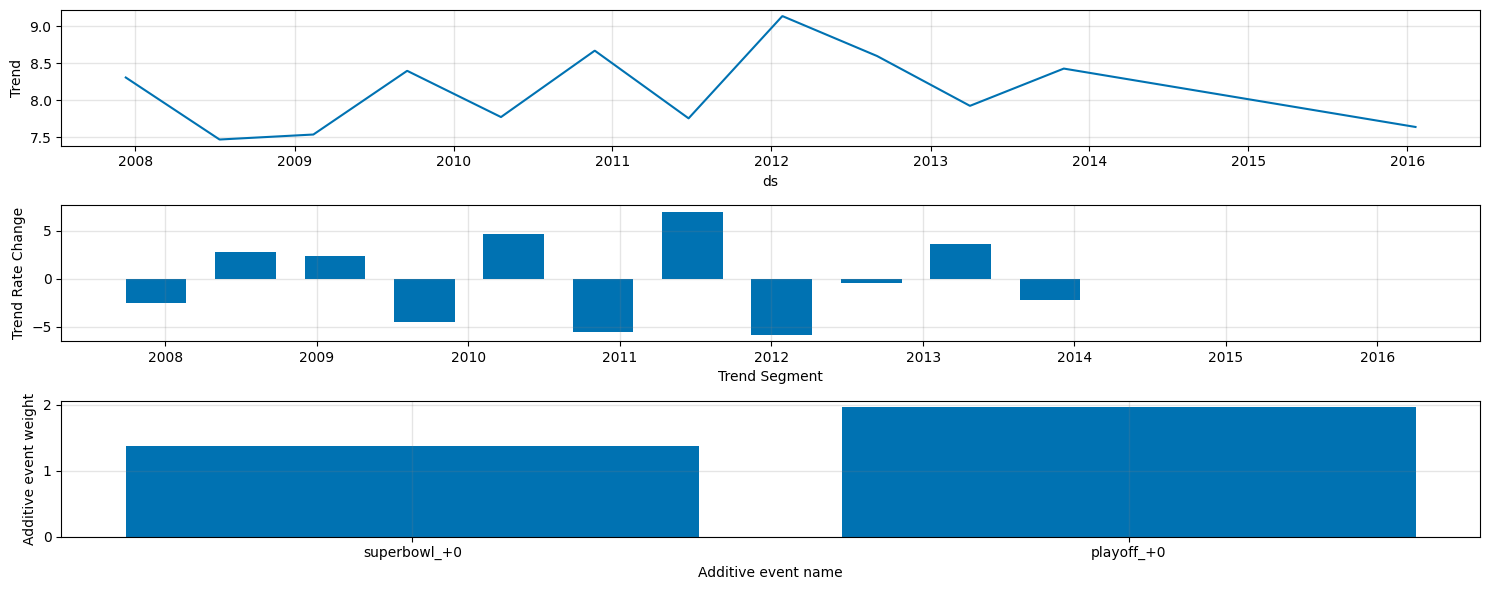

In [17]:
m.plot_parameters(figsize = (15, 6));

In [22]:
# Multiplicative events.
m = NeuralProphet()
m = m.add_events(["superbowl", "playoff"], mode="multiplicative")

In [ ]:
# Regularization of events.
m = NeuralProphet()
m = m.add_country_holidays("US", mode="additive", regularization=0.05)

In [24]:
# Window events.
m = NeuralProphet()
m = m.add_events(["superbowl", "playoff"], lower_window=-1, upper_window=1)

In [ ]:
# Holidays.
m = NeuralProphet()
m.add_country_holidays("US", mode="additive", lower_window=-1, upper_window=1)